In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


data = r"C:\Users\Nobre\Documents\Ciencia da Computacao - UNIPE\Fábrica\Git\Desafio_Final_WKS_25.2\desafiofinal\Python\pneumologista_joao_pacientes.csv"
df = pd.read_csv(data)

df.info()

medianas = df.median(numeric_only=True)
df.fillna(medianas, inplace=True)



df.head()

#df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nome_paciente                 1000 non-null   object 
 1   idade                         1000 non-null   int64  
 2   sexo                          1000 non-null   object 
 3   tabagismo                     1000 non-null   object 
 4   descoloracao_dedos            1000 non-null   object 
 5   estresse_mental               1000 non-null   object 
 6   exposicao_poluicao            1000 non-null   object 
 7   doenca_cronica                1000 non-null   object 
 8   nivel_energia                 1000 non-null   object 
 9   fraqueza_imunologica          1000 non-null   object 
 10  problema_respiratorio         1000 non-null   object 
 11  consumo_alcool                1000 non-null   object 
 12  desconforto_garganta          966 non-null    object 
 13  satu

,nome_paciente,idade,sexo,tabagismo,descoloracao_dedos,estresse_mental,exposicao_poluicao,doenca_cronica,nivel_energia,fraqueza_imunologica,...,saturacao_oxigenio,aperto_peito,historico_familiar,historico_tabagismo_familiar,estresse_imunologico,doenca_pulmonar,peso_kg,altura_m,imc,risco_cancer_pulmao
0,Ana Silva,54,F,Não,Não,Baixo,Baixa,Sim,Alto,Não,...,96.7,Não,Não,Sim,Baixo,Não,38.8,1.79,12.1,Sem Risco
1,Mariana Lima,38,Masc,Não,Não,Moderado,Média,Sim,Moderado,Não,...,97.0,Não,Não,Sim,Moderado,Não,77.8,1.60,30.4,Sem Risco
2,Tiago Barbosa,50,Masc,Não,Não,Alto,Média,Não,Alto,Não,...,92.1,Sim,Não,Não,Baixo,Não,57.8,1.62,22.0,Sem Risco
3,Carlos Alves,56,M,Não,Não,Baixo,Baixa,Sim,Alto,Não,...,99.2,Não,Não,Não,Alto,Não,83.4,1.64,31.0,Sem Risco
4,Paula Costa,18,Outro,Sim,Não,Baixo,Média,Não,Moderado,Não,...,99.1,Não,Sim,Não,Baixo,Não,85.5,1.80,26.4,Risco


In [17]:
df['desconforto_garganta'] = df['desconforto_garganta'].astype('string')
df['desconforto_garganta']

df.info()

df.dropna(subset=['desconforto_garganta'], inplace=True)

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nome_paciente                 1000 non-null   object 
 1   idade                         1000 non-null   int64  
 2   sexo                          1000 non-null   object 
 3   tabagismo                     1000 non-null   object 
 4   descoloracao_dedos            1000 non-null   object 
 5   estresse_mental               1000 non-null   object 
 6   exposicao_poluicao            1000 non-null   object 
 7   doenca_cronica                1000 non-null   object 
 8   nivel_energia                 1000 non-null   object 
 9   fraqueza_imunologica          1000 non-null   object 
 10  problema_respiratorio         1000 non-null   object 
 11  consumo_alcool                1000 non-null   object 
 12  desconforto_garganta          966 non-null    string 
 13  satu

nome_paciente                   0
idade                           0
sexo                            0
tabagismo                       0
descoloracao_dedos              0
estresse_mental                 0
exposicao_poluicao              0
doenca_cronica                  0
nivel_energia                   0
fraqueza_imunologica            0
problema_respiratorio           0
consumo_alcool                  0
desconforto_garganta            0
saturacao_oxigenio              0
aperto_peito                    0
historico_familiar              0
historico_tabagismo_familiar    0
estresse_imunologico            0
doenca_pulmonar                 0
peso_kg                         0
altura_m                        0
imc                             0
risco_cancer_pulmao             0
dtype: int64

In [18]:
df['sexo']


mapa_de_correcao = {
    'F': 'Feminino',
    'Fem': 'Feminino',
    'M': 'Masculino',
    'Masc': 'Masculino'
}


df['sexo'] = df['sexo'].replace(mapa_de_correcao)


print("Valores únicos após a limpeza:")
print(df['sexo'].unique())

print("\nContagem de cada categoria:")
print(df['sexo'].value_counts())


Valores únicos após a limpeza:
['Feminino' 'Masculino' 'Outro' 'Não declarado']

Contagem de cada categoria:
sexo
Feminino         367
Masculino        337
Outro            131
Não declarado    131
Name: count, dtype: int64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 966 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nome_paciente                 966 non-null    object 
 1   idade                         966 non-null    int64  
 2   sexo                          966 non-null    object 
 3   tabagismo                     966 non-null    object 
 4   descoloracao_dedos            966 non-null    object 
 5   estresse_mental               966 non-null    object 
 6   exposicao_poluicao            966 non-null    object 
 7   doenca_cronica                966 non-null    object 
 8   nivel_energia                 966 non-null    object 
 9   fraqueza_imunologica          966 non-null    object 
 10  problema_respiratorio         966 non-null    object 
 11  consumo_alcool                966 non-null    object 
 12  desconforto_garganta          966 non-null    string 
 13  saturacao_

In [20]:
df.head()

,nome_paciente,idade,sexo,tabagismo,descoloracao_dedos,estresse_mental,exposicao_poluicao,doenca_cronica,nivel_energia,fraqueza_imunologica,...,saturacao_oxigenio,aperto_peito,historico_familiar,historico_tabagismo_familiar,estresse_imunologico,doenca_pulmonar,peso_kg,altura_m,imc,risco_cancer_pulmao
0,Ana Silva,54,Feminino,Não,Não,Baixo,Baixa,Sim,Alto,Não,...,96.7,Não,Não,Sim,Baixo,Não,38.8,1.79,12.1,Sem Risco
1,Mariana Lima,38,Masculino,Não,Não,Moderado,Média,Sim,Moderado,Não,...,97.0,Não,Não,Sim,Moderado,Não,77.8,1.60,30.4,Sem Risco
2,Tiago Barbosa,50,Masculino,Não,Não,Alto,Média,Não,Alto,Não,...,92.1,Sim,Não,Não,Baixo,Não,57.8,1.62,22.0,Sem Risco
3,Carlos Alves,56,Masculino,Não,Não,Baixo,Baixa,Sim,Alto,Não,...,99.2,Não,Não,Não,Alto,Não,83.4,1.64,31.0,Sem Risco
4,Paula Costa,18,Outro,Sim,Não,Baixo,Média,Não,Moderado,Não,...,99.1,Não,Sim,Não,Baixo,Não,85.5,1.80,26.4,Risco


In [21]:
df['imc'].describe()

count    966.000000
mean      27.089855
std        5.990722
min        8.200000
25%       23.100000
50%       26.800000
75%       30.700000
max       47.700000
Name: imc, dtype: float64

In [22]:
nome_arquivo_limpo = 'pneumologista_joao_pacientes_tratados.csv'

df.to_csv(nome_arquivo_limpo, index=False, encoding='utf-8-sig')

print(f"DataFrame limpo foi salvo com sucesso no arquivo '{nome_arquivo_limpo}'!")

DataFrame limpo foi salvo com sucesso no arquivo 'pneumologista_joao_pacientes_tratados.csv'!


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 966 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nome_paciente                 966 non-null    object 
 1   idade                         966 non-null    int64  
 2   sexo                          966 non-null    object 
 3   tabagismo                     966 non-null    object 
 4   descoloracao_dedos            966 non-null    object 
 5   estresse_mental               966 non-null    object 
 6   exposicao_poluicao            966 non-null    object 
 7   doenca_cronica                966 non-null    object 
 8   nivel_energia                 966 non-null    object 
 9   fraqueza_imunologica          966 non-null    object 
 10  problema_respiratorio         966 non-null    object 
 11  consumo_alcool                966 non-null    object 
 12  desconforto_garganta          966 non-null    string 
 13  saturacao_

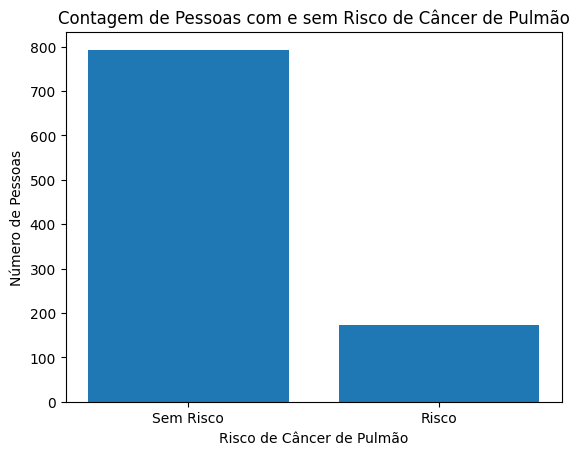

In [24]:
contagem_de_riscos = df['risco_cancer_pulmao'].value_counts()
plt.bar(contagem_de_riscos.index, contagem_de_riscos.values)

plt.title('Contagem de Pessoas com e sem Risco de Câncer de Pulmão')
plt.xlabel('Risco de Câncer de Pulmão')
plt.ylabel('Número de Pessoas')


plt.savefig('risco_cancer_pulmao_barras.png')


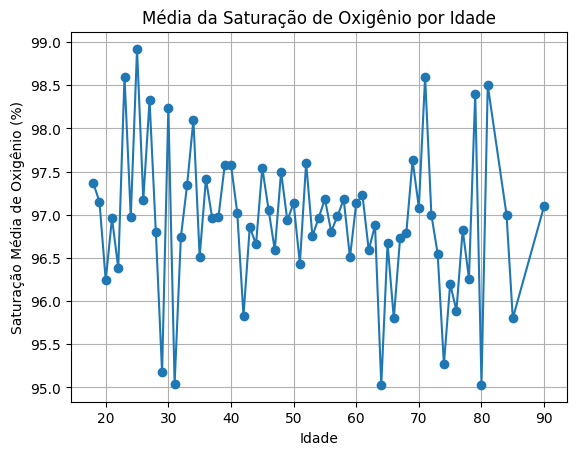

In [25]:
saturacao_media_por_idade = df.groupby('idade')['saturacao_oxigenio'].mean() #agrupa por idade e calcula a media

# Reseta o índice para 'idade' se tornar uma coluna
saturacao_media_por_idade = saturacao_media_por_idade.reset_index()

plt.plot(saturacao_media_por_idade['idade'], saturacao_media_por_idade['saturacao_oxigenio'], marker='o')

plt.title('Média da Saturação de Oxigênio por Idade')
plt.xlabel('Idade')
plt.ylabel('Saturação Média de Oxigênio (%)')
plt.grid(True)


plt.savefig('saturacao_media_por_idade.png')


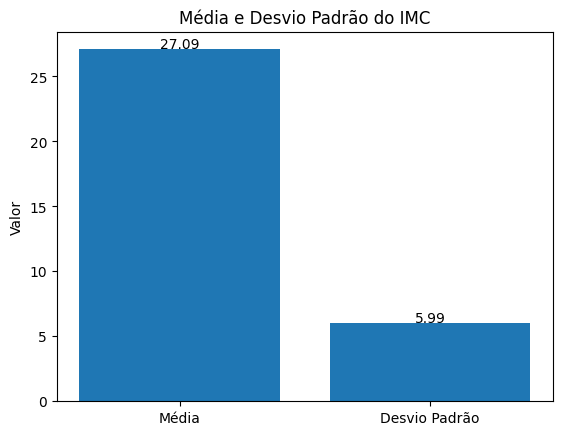

In [26]:
imc_data = df['imc'].values

media_imc = np.mean(imc_data)
desvio_padrao_imc = np.std(imc_data)

estatisticas = ['Média', 'Desvio Padrão']
valores = [media_imc, desvio_padrao_imc]

plt.bar(estatisticas, valores)


plt.title('Média e Desvio Padrão do IMC')
plt.ylabel('Valor')

# Adiciona o valor exato no topo de cada barra para clareza
for i, valor in enumerate(valores):
    plt.text(i, valor + 0.1, f'{valor:.2f}', ha='center')

plt.savefig('imc_media_desvio.png')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 966 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nome_paciente                 966 non-null    object 
 1   idade                         966 non-null    int64  
 2   sexo                          966 non-null    object 
 3   tabagismo                     966 non-null    object 
 4   descoloracao_dedos            966 non-null    object 
 5   estresse_mental               966 non-null    object 
 6   exposicao_poluicao            966 non-null    object 
 7   doenca_cronica                966 non-null    object 
 8   nivel_energia                 966 non-null    object 
 9   fraqueza_imunologica          966 non-null    object 
 10  problema_respiratorio         966 non-null    object 
 11  consumo_alcool                966 non-null    object 
 12  desconforto_garganta          966 non-null    string 
 13  saturacao_